In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

os.getcwd()

'c:\\Users\\matte\\OneDrive\\Desktop\\Università\\Trieste\\Second_year\\HPC21\\Cozzini\\MPI\\Assignment1\\Jacobi\\thin_jacobi_cores'

In [22]:
filename = 'thin_cores_4.csv'
colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
data_frame = pd.read_csv(filename, names=colnames, header=None)
data_frame = data_frame.round(3)
data_frame
#data_frame.mean(axis=0)
#data = data_frame.values

,Maxtime [s],Mintime [s],JacobiMin [s],JacobiMax [s],Residuals,MLUPs
0,3.865,3.865,3.768,3.779,1.202000e+07,447.092
1,3.861,3.861,3.768,3.780,2.000000e+06,447.600
2,3.860,3.860,3.768,3.779,4.259259e+05,447.642
3,3.861,3.861,3.768,3.780,1.265432e+05,447.603
4,3.860,3.860,3.768,3.779,5.182613e+04,447.628
5,3.860,3.860,3.768,3.780,2.670213e+04,447.611
6,3.860,3.860,3.768,3.779,1.589400e+04,447.633
7,3.860,3.860,3.768,3.779,1.037824e+04,447.653
8,3.860,3.860,3.768,3.779,7.222263e+03,447.628
9,3.861,3.861,3.768,3.780,5.266190e+03,447.604


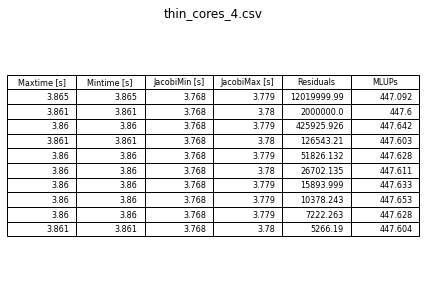

In [27]:
# creating table
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
t= ax.table(cellText=data_frame.values, colWidths = [0.2]*len(data_frame.columns),  colLabels=data_frame.columns,  loc='center')
t.auto_set_font_size(False) 
t.set_fontsize(8)
fig.tight_layout()
plt.show()

In [17]:
def get_averages(filename):
    colnames = ['Maxtime [s]', 'Mintime [s]', 'JacobiMin [s]', 'JacobiMax [s]', 'Residuals', 'MLUPs']
    data_frame = pd.read_csv(filename, names=colnames, header=None)
    averages = data_frame.mean(axis=0)
    return round(averages, 3)

In [20]:
filenames = ['thin_cores_4.csv', 'thin_cores_8.csv', 'thin_cores_12.csv']
Maxtimes = []
Mintimes = []
JacobiMin = []
JacobiMax = []
Residuals = []
MLUPs = []

for filename in filenames:
    averages = get_averages(filename)
    Maxtimes.append(averages[0])
    Mintimes.append(averages[1])
    JacobiMin.append(averages[2])
    JacobiMax.append(averages[3])
    Residuals.append(averages[4])
    MLUPs.append(averages[5])

Maxtimes = np.array(Maxtimes)
Mintimes = np.array(Mintimes)
JacobiMax = np.array(JacobiMax)
JacobiMin = np.array(JacobiMin)
Residuals = np.array(Residuals)
MLUPs = np.array(MLUPs)

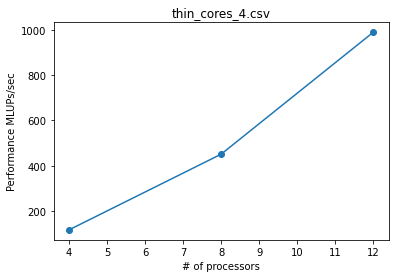

In [32]:
MLUPs_second = np.divide(MLUPs, Maxtimes)
N = np.array([4,8,12])

plt.figure()
plt.scatter(N, MLUPs_second)
plt.plot(N,MLUPs_second)
plt.title('thin_cores_4.csv')
plt.xlabel("# of processors")
plt.ylabel("Performance [MLUPs/sec]")
plt.show()

In [29]:
print(JacobiMax)
print(Maxtimes)


[3.779 1.896 1.276]
[3.861 1.958 1.321]
